# Running Workout Statistics and Graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
from datetime import datetime

plt.style.use('ggplot')

start = time.perf_counter()

In [2]:
df = pd.read_csv('HeartWatch-Workouts-20230718-to-20230818.csv')

In [3]:
df = df.drop(['Date', 'from', 'to', 'rpe', 'Load', 'bpm-lo', 'bpm-90%+-%', '90%+-mins',
              'bpm-80-90%-%', '80-90%-mins','bpm-70-80%-%', '70-80%-mins','bpm-60-70%-%',
              '60-70%-mins','bpm-50-60%-%', '50-60%-mins'], axis=1)

# Drop Run w/ Bear
df = df.drop(19)

In [4]:
# Fix Datetime Columns
df['ISO'] = pd.to_datetime(df['ISO'])
df['Duration'] = pd.to_timedelta(df['Duration'])
df['/km'] = pd.to_timedelta(df['/km'])

df['ISO'] = df['ISO'].dt.date

df.head()

,ISO,Duration,Type,bpm-Avg.,bpm-%,bpm-hi,Cals,Cals/h,km,km/h,/km
0,2023-07-19,0 days 00:30:04,Running,155.9,81.4,164.0,289.8,578.3,3.81,7.6,0 days 00:07:53
1,2023-07-20,0 days 00:36:56,Running,157.3,82.1,170.0,399.0,648.0,5.06,8.2,0 days 00:07:18
2,2023-07-21,0 days 00:31:31,Running,152.8,79.7,181.0,302.5,575.7,4.08,7.8,0 days 00:07:43
3,2023-07-24,0 days 01:12:34,Cycling,135.6,70.8,188.0,277.1,229.1,17.31,14.3,0 days 00:04:11
4,2023-07-25,0 days 02:16:52,Cycling,143.6,74.9,182.0,661.4,290.0,35.16,15.4,0 days 00:03:53


In [5]:
dfRun = df[df['Type'] == 'Running']
dfBike = df[df['Type'] == 'Cycling']
dfOther = df[~df['Type'].isin(['Running', 'Cycling'])]

# print(dfRun.info())
# print(dfBike.info())
# print(dfOther.head())

In [6]:
dfRun.tail()

,ISO,Duration,Type,bpm-Avg.,bpm-%,bpm-hi,Cals,Cals/h,km,km/h,/km
17,2023-08-11,0 days 00:39:03,Running,148.2,77.4,161.0,434.2,667.1,5.14,7.9,0 days 00:07:35
20,2023-08-15,0 days 01:08:11,Running,151.3,79.0,177.0,792.8,697.6,9.22,8.1,0 days 00:07:23
23,2023-08-17,0 days 00:41:24,Running,157.9,82.4,189.0,498.9,723.0,6.12,8.9,0 days 00:06:45
24,2023-08-18,0 days 00:49:30,Running,139.7,72.9,162.0,550.8,667.5,6.64,8.0,0 days 00:07:27
25,2023-08-18,0 days 00:49:51,Running,148.9,77.7,170.0,591.6,712.0,7.09,8.5,0 days 00:07:02


In [7]:
# Pace Calculation
# Calculate the total seconds of Duration column
total_seconds = dfRun['Duration'].dt.total_seconds()

# Average Pace from M/S
mps = dfRun['km'].sum()*1000 / total_seconds.sum()
kph = mps * 3.6
mpk = 60 / kph

integer_part = int(mpk)
decimal_part = mpk - integer_part

# Convert decimal part to minutes by dividing by 60
decimal_minutes = round(decimal_part * 60,0)

In [8]:
# Weighted HR
dfRunWght = dfRun

# Convert the time delta to decimal hours and create a new column
dfRunWght["Duration"] = dfRunWght["Duration"].apply(lambda x: x.total_seconds() / 3600)
dfRunWght['Weighted HR'] = dfRunWght['Duration'] * dfRunWght['bpm-Avg.']

# HR/Speed Decimal
dfRun['HR/Speed'] = (dfRun['bpm-Avg.'] / dfRun['km/h']) 

/var/folders/y_/8cmvsg791ys9qqbzj_yxrlj40000gn/T/ipykernel_15462/3208722300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRunWght["Duration"] = dfRunWght["Duration"].apply(lambda x: x.total_seconds() / 3600)
/var/folders/y_/8cmvsg791ys9qqbzj_yxrlj40000gn/T/ipykernel_15462/3208722300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRunWght['Weighted HR'] = dfRunWght['Duration'] * dfRunWght['bpm-Avg.']
/var/folders/y_/8cmvsg791ys9qqbzj_yxrlj40000gn/T/ipykernel_15462/3208722300.py:9: SettingWithCo

## Graphs

#### Running Distance Frequency 

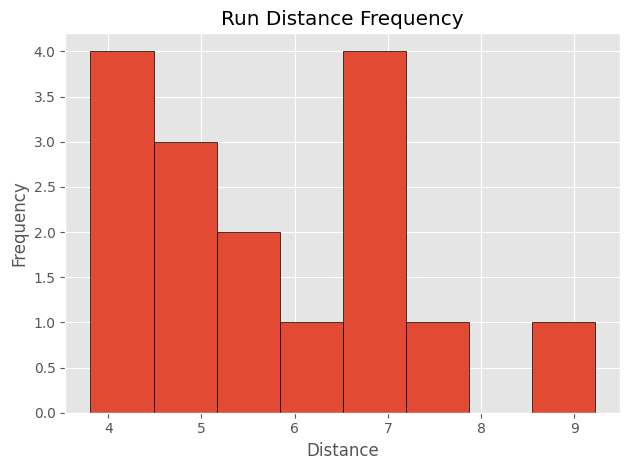

In [9]:
plt.hist(dfRun['km'], edgecolor='black', bins=8)
plt.title('Run Distance Frequency')
plt.xlabel('Distance')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Graphs/Distance Frequency.png', dpi=300)
plt.show()

#### Average Heart Rate Frequency

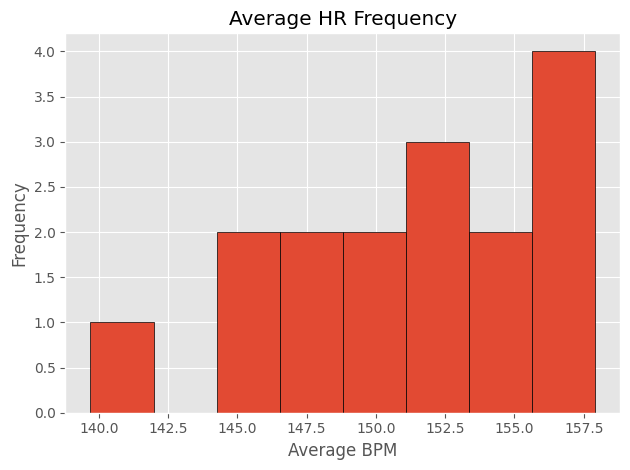

In [10]:
# bin_ct = int(np.sqrt(len(dfRun)))
# plt.hist(dfRun['bpm-Avg.'], edgecolor='black', bins=bin_ct)

plt.hist(dfRun['bpm-Avg.'], edgecolor='black', bins=8)
plt.title('Average HR Frequency')
plt.xlabel('Average BPM')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Graphs/HR Frequency.png', dpi=300)
plt.show()

#### Average Heart Rate versus Average Speed (km/h)

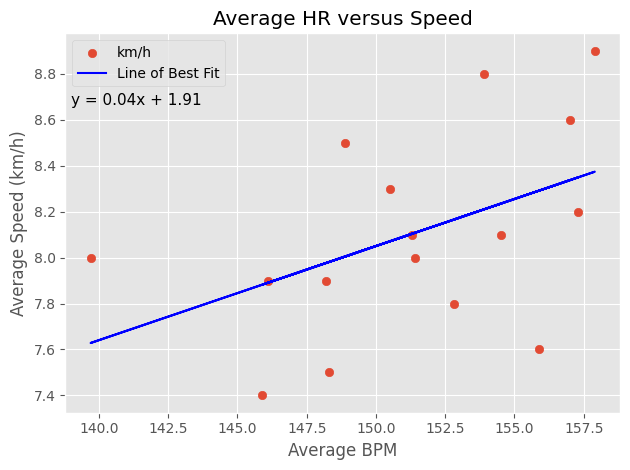

In [11]:
# Line of Best Fit
# Fit a linear regression line to the data
degree = 1
coefficients = np.polyfit(dfRun['bpm-Avg.'], dfRun['km/h'], degree)
slope = coefficients[0]
intercept = coefficients[1]
# Calculate the predicted y-values using the line equation
predicted_y = slope * dfRun['bpm-Avg.'] + intercept
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot
plt.scatter('bpm-Avg.', 'km/h', data=dfRun)
plt.plot(dfRun['bpm-Avg.'], predicted_y, color='blue', label='Line of Best Fit')
plt.xlabel('Average BPM')
plt.ylabel('Average Speed (km/h)')
plt.title('Average HR versus Speed')
plt.text(0.01, 0.81, equation, fontsize=11, transform=plt.gca().transAxes)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Graphs/SpeedvsHR.png', dpi=300)
plt.show()

#### Heart Rate / Speed over Time

Lower is better

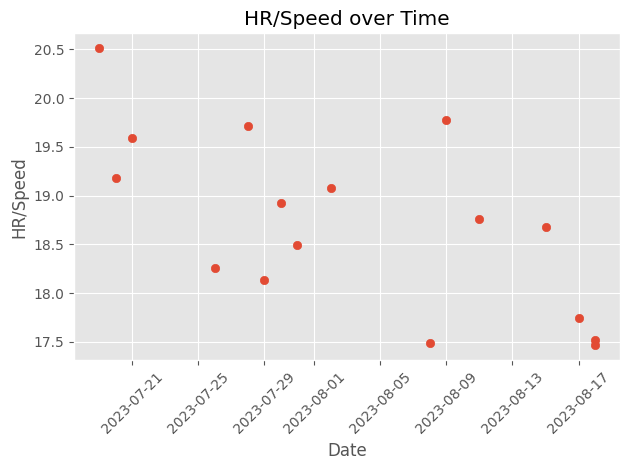

In [12]:
# plt.figure(figsize=(10, 6))
plt.scatter('ISO', 'HR/Speed', data=dfRun)
plt.xlabel('Date')
# plt.xticks(dfRun['ISO'][::2], rotation=45)
plt.xticks(rotation=45)
plt.ylabel('HR/Speed')
plt.title('HR/Speed over Time')
plt.grid(True)
plt.tight_layout()
plt.savefig('Graphs/HR-Speed over Time.png', dpi=300)
plt.show()

In [13]:
# Average Duration, Distance, Average HR, Average Max HR Average Calories
avg_dist = round(dfRun['km'].mean(),2)
avg_hr = round(dfRun['bpm-Avg.'].mean(),2)
avg_wght_hr = round(dfRunWght['Weighted HR'].sum() / dfRunWght['Duration'].sum(),2)
avg_maxhr = round(dfRun['bpm-hi'].mean(),2)
avg_cals = round(dfRun['Cals'].mean(),2)
avg_dur = dfRun['Duration'].mean()

# Count Runs
num_runs = dfRun['km'].count()
ovr_5k = dfRun[dfRun['km'] >=5].count()['km']
povr_5k = round(ovr_5k / num_runs *100,2)
ovr_10k = dfRun[dfRun['km'] >=10].count()['km']
povr_10k = round(ovr_10k / num_runs *100,2)

# Maximums
max_dur = dfRun['Duration'].max()
max_dist = dfRun['km'].max()
max_avghr = dfRun['bpm-Avg.'].max()
max_maxhr = dfRun['bpm-hi'].max()
max_cals = dfRun['Cals'].max()

# Totals
tot_dist = round(dfRun['km'].sum(),2)
tot_dur = dfRun['Duration'].sum()
tot_cals = round(dfRun['Cals'].sum(),2)

# Medians
med_dist = round(dfRun['km'].median(),2)
med_avg_hr = round(dfRun['bpm-Avg.'].median(),2)
med_max_hr = round(dfRun['bpm-hi'].median(),2)
med_cals = round(dfRun['Cals'].median(),2)

# Durations to Time Format
avg_dur_h = int(avg_dur)
max_dur_h = int(max_dur)
tot_dur_h = int(tot_dur)

avg_dur_m_dec = (avg_dur - avg_dur_h)*60
max_dur_m_dec = (max_dur - max_dur_h)*60
tot_dur_m_dec = (tot_dur - tot_dur_h)*60

avg_dur_m = int(avg_dur_m_dec)
max_dur_m = int(max_dur_m_dec)
tot_dur_m = int(tot_dur_m_dec)

avg_dur_s = int((avg_dur_m_dec - avg_dur_m)*60)
max_dur_s = int((max_dur_m_dec - max_dur_m)*60)
tot_dur_s = int((tot_dur_m_dec - tot_dur_m)*60)

avg_dur_f = str(avg_dur_h) + ':' + str(avg_dur_m) + ':' + str(avg_dur_s)
max_dur_f = str(max_dur_h) + ':' + str(max_dur_m) + ':' + str(max_dur_s)
tot_dur_f = str(tot_dur_h) + ':' + str(tot_dur_m) + ':' + str(tot_dur_s)

## Final Running Stats

In [14]:
print(f'Runs: {num_runs}')
print(f'Runs over 5k(%): {ovr_5k} ({povr_5k}%)')
print(f'Runs over 10k(%): {ovr_10k} ({povr_10k}%)')

print('----------------------------')
print(f'Average Duration: {avg_dur_f}')
print(f'Average Distance: {avg_dist}')
print(f"Average Pace: {integer_part}:{decimal_minutes}")
print(f'Average Weighted HR: {avg_wght_hr}')
print(f'Average HR: {avg_hr}')
print(f'Average Max HR: {avg_maxhr}')
print(f'Average Calories: {avg_cals}')

print('----------------------------')
print(f'Max Duration: {max_dur_f}')
print(f'Max Distance: {max_dist}')
print(f'Max Average HR: {max_avghr}')
print(f'Max Max HR: {max_maxhr}')
print(f'Max Calories: {max_cals}')

print('----------------------------')
print(f'Median Distance: {med_dist}')
print(f'Median Avg HR: {med_avg_hr}')
print(f'Median Max HR: {med_max_hr}')
print(f'Median Calories: {med_cals}')

print('----------------------------')
print(f'Total Duration: {tot_dur_f}')
print(f'Total Distance: {tot_dist}')
print(f'Total Calories Burn: {tot_cals}')

print('----------------------------')
print(f'Runtime: {round(time.perf_counter() - start,2)}s')

Runs: 16
Runs over 5k(%): 12 (75.0%)
Runs over 10k(%): 0 (0.0%)
----------------------------
Average Duration: 0:43:5
Average Distance: 5.81
Average Pace: 7:25.0
Average Weighted HR: 150.6
Average HR: 151.23
Average Max HR: 169.06
Average Calories: 475.62
----------------------------
Max Duration: 1:8:11
Max Distance: 9.22
Max Average HR: 157.9
Max Max HR: 189.0
Max Calories: 792.8
----------------------------
Median Distance: 5.59
Median Avg HR: 151.35
Median Max HR: 167.0
Median Calories: 460.85
----------------------------
Total Duration: 11:29:34
Total Distance: 92.96
Total Calories Burn: 7609.9
----------------------------
Runtime: 1.16s
